<a href="https://colab.research.google.com/github/BlinkovYevhenGit/CE888_Repository/blob/main/Lab7/Exercise_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 3: 

Please consider this Time Series Prediction with LSTM Recurrent Neural Networks. We can see that the LSTM model in the code below has an average error of about 23 passengers (in thousands) on the training dataset, and about 53 passengers (in thousands) on the test dataset. Not that bad. Can you please improve the performance?

#### Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.



In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')



In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX,testY=create_dataset(test,look_back)

In [ ]:
# https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/
import numpy as np
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [ ]:
 # create and fit the LSTM 
model = Sequential()
model.add(LSTM(40, input_shape=(1, look_back)))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics = ['mean_squared_error'], optimizer='rmsprop')


In [ ]:
btss = BlockingTimeSeriesSplit(n_splits=5)
cvscores = []
for train_index, test_index in btss.split(trainX):
  X_train, X_val = trainX[train_index], trainX[test_index]
  y_train, y_val = trainY[train_index], trainY[test_index]

    # reshape input to be [samples, time steps, features]
  X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_val = numpy.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
  # create and fit the LSTM 
  model.fit(X_train, y_train,epochs=150, batch_size=1, verbose=0)

  # evaluate the model
  scores = model.evaluate(X_val, y_val, verbose=1)
  cvscores.append(scores[1])
print("%.3f (+/- %.3f)" % (numpy.mean(cvscores), numpy.std(cvscores)))

1/1 [==============================] - 0s 19ms/step - loss: 0.0020 - mean_squared_error: 0.0020
0.002 (+/- 0.001)


In [ ]:
  # reshape input to be [samples, time steps, features]
  trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=1)

Epoch 1/150
80/80 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 2/150
80/80 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/150
80/80 [==============================] - 0s 2ms/step - loss: 9.5262e-04 - mean_squared_error: 9.5262e-04
Epoch 4/150
80/80 [==============================] - 0s 2ms/step - loss: 8.8692e-04 - mean_squared_error: 8.8692e-04
Epoch 5/150
80/80 [==============================] - 0s 2ms/step - loss: 8.9356e-04 - mean_squared_error: 8.9356e-04
Epoch 6/150
80/80 [==============================] - 0s 2ms/step - loss: 7.6403e-04 - mean_squared_error: 7.6403e-04
Epoch 7/150
80/80 [==============================] - 0s 2ms/step - loss: 7.8018e-04 - mean_squared_error: 7.8018e-04
Epoch 8/150
80/80 [==============================] - 0s 2ms/step - loss: 6.7080e-04 - mean_squared_error: 6.7080e-04
Epoch 9/150
80/80 [==============================] - 0s 3ms/step - loss: 8.2214e

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

>

>

 >

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.08 RMSE
Test Score: 16.55 RMSE


>

>

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

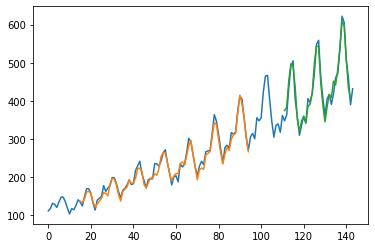

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()